# What is Machine Learning?
**Machine Learning** is the science (and art) of programming computers so they can learn from data.

Applying ML techniques to dig into large amounts of data can help discover patterns that were not immediately apparent. This is called **Data Mining**.

To summarize, ML is greate for:
- problems for which existing solutions require a lot of hand-tuning or long lists of rules: one ML algorithm can often simplify code and perform better.
- Complex probelms for which there is no good solution at all using a traditonal approach: the best ML techniques can find a solution.
- Flucuating environments:a ML system can adapt to new data.
- Getting insights about complex problems and large amounts of data.

# Types of Machine Learning
It is uesful to calssify them in broad categories based on:
- Whether or not they are trained with human supervision(supervised, unsupervised, semisupervised, and Reinforment Learning)
- Whether or not they can learn incrementally on the fly(online versus batch learning)
- Whether whty work by simply comparing new data points to known data points, or instead detect patterns in the training data and build a predictive model, much like scientists do(instance-based versus model-based learning)

## supervised learning algorithms
- k-Nearest Neighbors
- Linear Regression
- Logistic Regression
- Support Vector Machines
- Decision Trees and Random Forests
- Neural networks

## unsupervised learning
- Clustering
    - k-Means
    - Hierarchical Cluster Analysis(HCA)
    - Expectation Maximization
- Visualization and dimensionality reduction
    - Pricipal Componet Analysis(PCA)
    - Kernel PCA
    - Locally-Linear Embedding(LLE)
    - t-distributed Stochatic Neighbor Embeddings(t-SNE)
- Assciation rule learning(digging into large amounts of data and discover interesting relations between attributes.)
    - Apriori
    - Eclat
    
It is often a good idea to try to reduce the dimension of your training data using dimensionality reduction algorithm before you feed it to another ML algorithm. It will run much faster and sometimes perform better.

## Semisupervised learning
dealing with partially labeled training data, usually a lot of unlabeled data and a little bit of labeled data.

## Reinforcement Learning
Reinforcement Learning is a very different BEAST. The learning system, called an *agent* in this context, can observe the environment, select and perform actions, and get *reward* in return(or *penalties* in the form of negative rewards)

## Batch and online Learning
### Batch learning
The system is **incapable** of learning incrementally: it must be trained using all the available data. This will generally take a lot of time and computing resources, so it is typically done offline. **It just applies what it has learned.**

If you want a batch learning system to know about new data, you need to replace the old system with a new trained system.
### Online learning(Incremental learning)
In online learning, you train the systemn incrementally by feeding it data instances sequentially, either individually or by small called **mini-batches**. Each learning step is fast and cheap.

One important parameter of online learning systems is how fast they should adapt to changing data. This is called **learning rate**.

One big challenge with online learning is that **if bad data is fed to the system, the system's performance will gradually decline.**

## Instance-based Versus Model-based Learning
### instance-based learning
The system learns the examples by heart, then generailzes to new cases using a similarity measure.

### model-based learning
Another way to generalize from a set of examples is to build a model of these examples, then use that model to make *predicitons*.

*Example 1-1. Training and running a linear model using Scikit-Learn*

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import matplotlib

In [8]:
# Load the data
oecd_bli = pd.read_csv('datasets/lifesat/oecd_bli_2015.csv',thousands=',')
gdp_per_capita = pd.read_csv('datasets/lifesat/gdp_per_capita.csv',thousands=',',delimiter='\t',encoding='latin1', na_values="n/a")

In [9]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [10]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [11]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [12]:
# prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats['Life satisfaction']]

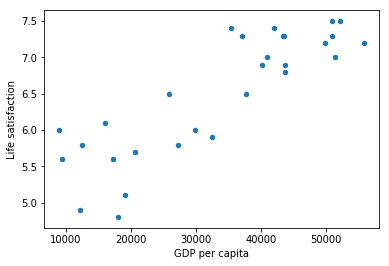

In [15]:
# visiualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

In [17]:
# Select a linear model
from sklearn import linear_model
lin_reg_model = linear_model.LinearRegression()

In [18]:
# Train the model
lin_reg_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Make a predition for Cyprus
X_new = [[22587]]  # Cyprus's GDP per capita
print(lin_reg_model.predict(X_new))

[[5.96242338]]


# Main Challenges of Machine Learning
## Insufficient Quantity of trainingData
**这里要有图片！!!**

## Nonrepresentative Training Data
**In order to generalize well, it is crucial that your training data be representative of the new cases you want to generalize to.**
- sampling noise
- sampling bias

## Poor-Quality Data
It is often well worth the effort to spend time cleaning up your training data. The truth is, most data scientists spend a significant part of their time doing that.

## Irrelevant Features
**Garbage in, garbage out**

A critical part of the success of a Machine Learning pproject is coming up with a good set of features to train on. This process, called **feature engineering**, involves:
- **feature selection**: selecting the most useful features to train on among existing features.
- **Feature extraction**: combining existing features to preduce a more useful one.
- Creating new features by gathering new data.

## Overfitting the Training data
It means that the model performs well on the training data, but it does not generalize well.

### Possibles solutions
- To simplify the model by selecting one with fewer parameter, by reducing the number of attributes in the training data or by constraining the model.
- To gather more training data
- To reduce the noise in the training data.

Constraining a model to make it simpler and reduce the risk of overfitting is called **regularization**. For example, the linear model we defined earlier has two parameters, $\theta_0$ and $\theta_1$. This gives the learning algorithm two *degrees of freedom* to adapt the model to the training data: it can tweak(调整）both the height($\theta_0$) and the slope($\theta_1$) of the line. If we forced $\theta_0 = 0$, the algorethm would have only one degree of freedom and would have a much harder time fitting the data properly: all it could do is move the line up or down to get as close as possible to the training instances, so it would end up around the mean. A very simple model indeed! If we allow the algorithm to modify $\theta_1$ but we force it to keep it small, then the learning algorithm will effectively have somewhere in betweent one and two degrees of freedom. **It will produce a simpler model than with two degree of freedom, but more complex than with just one.**
**这里要有图片！1-23!!**

The amount of regularization to apply during learning can be contraolled by a **hyperparameter**. A hyperparameter is a parameter of a learning algorithm(not of the model). It must be set prior to training and remains constant during training. **Tuning hyperparameters is an important part of building a Machine Learning system**.

## Underfitting the Training data
### Main options to fix that:
- Selecting a more powerful model, with more parameters
- Feeding better features to the learning algorithm.(feature engneering)
- Reducing the constraints on the model.

## Testing and Validating
Split your data into two sets: the **training set** and the **test set**. Train your model using the training set and test it using the test set. The error rate on new cases is called the **generalization error**. This value tells you how well your model will perform on instances it has never seen before. 

If the training error is low but the generalization error is high, it means that your model is **overfitting** the training data.

### how do you choose the value of regularization hyperparameter?
One option is to train 100 models using 100 different values for this hyperparameter. Suppose you find the best hyperparameter value, so you launch this model into production, but unfortunately it does not perform as well as expected. 

The problem is that you measured the generalization error multiple times on the test set, and you adapted the model and hyperparameters to produce the best model *for that set*. This means that the model is unlikely to perform as well as on new data. 

**A common solution to shis problem is to have a second holdout set called Validation set**. You train models with various hyperparameters using the training set, you select the model and hyperparameters that perform best on the validataion set, and when you are happy with your model you run a single final test against the test set to get an estimate of the generalization error.

To avoid "wasting" to much training data in validation sets, a common technique is to use **cross validation**. 